In [3]:
from pymongo import MongoClient
import pprint
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

db=MongoClient()["comic"]

# 1. 최고의 웹툰

좋아요 수

In [8]:
webtoons=db["webtoons"]

pipeline=[
    {
        '$sort': {
            'likeIt': -1
        }
    }, {
        '$project': {
            '_id': 0, 
            'title': 1, 
            'likeIt': 1
        }
    }, {
        '$limit': 10
    }
]

plist=list(webtoons.aggregate(pipeline))

df=pd.DataFrame(plist)

df=df[::-1]
df

,title,likeIt
9,윈드브레이커,965281
8,여신강림,1002792
7,연놈,1075687
6,복학왕,1102017
5,유미의 세포들,1236798
4,마음의소리,1307140
3,신의 탑,1341927
2,프리드로우,1477292
1,외모지상주의,1996585
0,연애혁명,2237081


<BarContainer object of 10 artists>

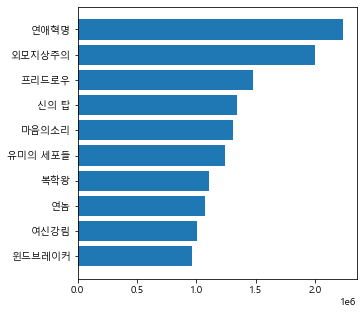

In [9]:
fig, ax = plt.subplots(figsize=(5,5))

plt.ticklabel_format(style='sci', axis='y', scilimits=(3,4))

ax.barh(list(df.title), list(df.likeIt))

# 2. 최고의 에피소드

좋아요 수, 댓글 수

In [14]:
episodes=db["episodes"]

pipeline=[
    {
        '$sort': {
            'totalComment': -1
        }
    }, {
        '$lookup': {
            'from': 'webtoons', 
            'localField': 'titleId', 
            'foreignField': 'titleId', 
            'as': 'webtoon'
        }
    }, {
        '$set': {
            'name': {
                '$arrayElemAt': [
                    '$webtoon.title', 0
                ]
            }
        }
    }, {
        '$project': {
            'totalComment': 1, 
            'episodeNo': 1, 
            'name': 1, 
            '_id': 0
        }
    }, {
        '$limit': 10
    }
]

plist=list(episodes.aggregate(pipeline))

df=pd.DataFrame(plist)
df

,episodeNo,totalComment,name
0,1225,52891,마음의소리
1,300,49619,연애혁명
2,40,27709,사신소년
3,33,24875,체크포인트
4,301,24678,연애혁명
5,1219,23465,마음의소리
6,23,22755,인생존망
7,110,20320,여신강림
8,109,18816,여신강림
9,304,17380,연애혁명


In [16]:
episodes=db["episodes"]

pipeline=[
    {
        '$sort': {
            'likeItCount': -1
        }
    }, {
        '$lookup': {
            'from': 'webtoons', 
            'localField': 'titleId', 
            'foreignField': 'titleId', 
            'as': 'webtoon'
        }
    }, {
        '$set': {
            'name': {
                '$arrayElemAt': [
                    '$webtoon.title', 0
                ]
            }
        }
    }, {
        '$project': {
            'likeItCount': 1, 
            'episodeNo': 1, 
            'name': 1, 
            '_id': 0
        }
    }, {
        '$limit': 10
    }
]

plist=list(episodes.aggregate(pipeline))

df=pd.DataFrame(plist)
df

,episodeNo,likeItCount,name
0,479,57133,유미의 세포들
1,91,52307,바른연애 길잡이
2,484,49777,유미의 세포들
3,301,48486,연애혁명
4,486,48213,유미의 세포들
5,481,47739,유미의 세포들
6,485,47305,유미의 세포들
7,487,47089,유미의 세포들
8,300,45302,연애혁명
9,480,43932,유미의 세포들


# 3. 최고의 댓글

좋아요-싫어요

In [19]:
comments=db["comments"]

pipeline=[
    {
        '$lookup': {
            'from': 'episodes', 
            'localField': 'episodeId', 
            'foreignField': '_id', 
            'as': 'episode'
        }
    }, {
        '$lookup': {
            'from': 'webtoons', 
            'localField': 'episode.titleId', 
            'foreignField': 'titleId', 
            'as': 'webtoon'
        }
    }, {
        '$set': {
            'episodeNo': {
                '$arrayElemAt': [
                    '$episode.episodeNo', 0
                ]
            }, 
            'title': {
                '$arrayElemAt': [
                    '$webtoon.title', 0
                ]
            }
        }
    }, {
        '$sort': {
            'like': -1
        }
    }, {
        '$project': {
            'title': 1, 
            'episodeNo': 1, 
            'like': 1, 
            'contents': 1, 
            '_id': 0
        }
    }, {
        '$limit': 10
    }
]

plist=list(comments.aggregate(pipeline))

df=pd.DataFrame(plist)
df

,contents,like,episodeNo,title
0,어..근데...선넘는게 아니고 남자화장실 들어갈뻔한 주경이 챙겨준거같은데....(난...,111123,109,여신강림
1,안녕하세요 송파에서 운세를 잘 맞춘다고 유명한 아기동자입니다. 만약 이 댓글에 좋아...,103251,51,이제 곧 죽습니다
2,아 미친ㅋㅋㅋㅋㅋㅋ고운이 들어올따 진짜 터짐ㅋㅋㅋㅋㅋㅋㅋㅋ좀 충격일듯ㅋㅋㅋㅋㅋㅋㅋㅋ...,98979,106,여신강림
3,나유연 장점\n군필\n4살차이\n단거 좋아하지만 아메리카노 먹는 스윗함\n키 큼\n...,93268,98,바른연애 길잡이
4,윰세포 회차중에 사랑세포랑 사랑세포가 껴안은거 본적없자나...서로 순수하게 가진 호...,91265,479,유미의 세포들
5,와 자림이 진짜 많이 변했다 ㅜㅜㅜㅜㅜㅜㅜㅜ 그냥 둘이 헤어지지말고 제발 오래가라....,87055,298,연애혁명
6,밀긴 뭘 밀어줘 바리깡으로 머리카락을 밀어버릴까,85684,304,연애혁명
7,서준이 옷도 오바 행동도 오바네,85447,109,여신강림
8,고1이 복싱 15년 어케했누 ㅋㅋㅋㅋㅋ,85139,20,인생존망
9,왘ㅋㅋ크기봐ㅋㅋㅋㅋ순록이 얼마나 응큼한거냐ㅋㅋㅋㅋ속이 시커먼 짐승이었어 ㅋㅋㄱ,85056,486,유미의 세포들
